In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

In [3]:
ames = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [4]:
def transform_features(df):
    return df

In [5]:
def select_features(df):
    return df[["Gr Liv Area","SalePrice"]]

In [6]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    train_numeric = train.select_dtypes(include=['integer', 'float'])
    test_numeric = test.select_dtypes(include=['integer', 'float'])
    
    features = train_numeric.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    train_prediction = lr.predict(train[features])
    test_prediction = lr.predict(test[features])
    test_mse = mean_squared_error(test_prediction, test["SalePrice"])
    test_rmse =np.sqrt(test_mse)
    print (test_rmse)
    return (test_rmse)

In [7]:
transform_features = transform_features(ames)
select_features = select_features(transform_features)
test_rmse = train_and_test(select_features)

57088.251612639084


In [8]:
ames_null_counts = ames.isnull().sum()
ames_high_null = ames[ames_null_counts[(ames_null_counts>=len(ames)/20)].index]
ames_high_null

,Lot Frontage,Alley,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,141.0,NaN,Gd,Attchd,1960.0,Fin,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,Attchd,1961.0,Unf,TA,TA,NaN,MnPrv,NaN
2,81.0,NaN,NaN,Attchd,1958.0,Unf,TA,TA,NaN,NaN,Gar2
3,93.0,NaN,TA,Attchd,1968.0,Fin,TA,TA,NaN,NaN,NaN
4,74.0,NaN,TA,Attchd,1997.0,Fin,TA,TA,NaN,MnPrv,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,NaN,NaN,Detchd,1984.0,Unf,TA,TA,NaN,GdPrv,NaN
2926,NaN,NaN,NaN,Attchd,1983.0,Unf,TA,TA,NaN,MnPrv,NaN
2927,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MnPrv,Shed
2928,77.0,NaN,TA,Attchd,1975.0,RFn,TA,TA,NaN,NaN,NaN


In [9]:
ames = ames.drop(ames_high_null, axis=1)

In [10]:
ames_null_counts = ames.isnull().sum()
ames_low_null = ames[ames_null_counts[(ames_null_counts>0) &  (ames_null_counts<len(ames)/20)].index]
print(ames_low_null.isnull().sum())

Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64


In [11]:
ames_low_obj = ames_low_null.select_dtypes(include=["object"]).isnull().sum()
ames_low_obj

Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Electrical         1
dtype: int64

In [12]:
ames = ames.drop(ames_low_obj.index, axis=1)

In [13]:
ames_low_null = ames_low_null.select_dtypes(include=['float', 'int'])
print(ames_low_null.mode().iloc[0])

Mas Vnr Area      0.0
BsmtFin SF 1      0.0
BsmtFin SF 2      0.0
Bsmt Unf SF       0.0
Total Bsmt SF     0.0
Bsmt Full Bath    0.0
Bsmt Half Bath    0.0
Garage Cars       2.0
Garage Area       0.0
Name: 0, dtype: float64


In [14]:
ames_clean = ames.fillna(ames_low_null.mode().iloc[0])  

In [15]:
ames_clean["yr before sold"]=ames_clean['Yr Sold'] - ames_clean['Year Built']
ames_clean["yr before sold"][ames_clean["yr before sold"] < 0]

2180   -1
Name: yr before sold, dtype: int64

In [16]:
ames_clean["yr since remod"]=ames_clean['Yr Sold'] - ames_clean['Year Remod/Add']
ames_clean["yr since remod"][ames_clean["yr since remod"] < 0]

1702   -1
2180   -2
2181   -1
Name: yr since remod, dtype: int64

In [17]:
ames_clean = ames_clean.drop([1702, 2180, 2181], axis=0)

In [18]:
ames_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS SubClass      2927 non-null   int64  
 3   MS Zoning        2927 non-null   object 
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

In [19]:
ames_clean = ames_clean.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [20]:
## Drop columns that aren't useful for ML
ames_clean = ames_clean.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
ames_clean = ames_clean.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [21]:
def up_transform_features(df):
    ames_null_counts = df.isnull().sum()
    ames_high_null = df[ames_null_counts[(ames_null_counts>=len(df)/20)].index]
    df = df.drop(ames_high_null, axis=1)
    
    ames_null_counts = df.isnull().sum()
    ames_low_null = df[ames_null_counts[(ames_null_counts>0) &  (ames_null_counts<len(df)/20)].index]
    ames_low_obj = ames_low_null.select_dtypes(include=["object"]).isnull().sum()
    df = df.drop(ames_low_obj.index, axis=1)
    
    ames_low_null = ames_low_null.select_dtypes(include=['float', 'int'])
    df = df.fillna(ames_low_null.mode().iloc[0])  
    
    df["yr before sold"]=df['Yr Sold'] - df['Year Built']
    df["yr before sold"][df["yr before sold"] < 0]

    df["yr since remod"]=df['Yr Sold'] - df['Year Remod/Add']
    df["yr since remod"][df["yr since remod"] < 0]
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

In [22]:
def select_features1(df):
    return df[["Gr Liv Area","SalePrice"]]

In [23]:
ames1 = pd.read_csv("AmesHousing.tsv", delimiter="\t")
clean_df= up_transform_features(ames1)

In [24]:
select_features1 = select_features1(clean_df)
test_rmse = train_and_test(select_features1)

55275.367312413066


In [25]:
num_df = clean_df.select_dtypes(['integer', 'float'])
correl = num_df

#see the closest correlation - make into abs number and sort
sorted_corrs= correl.corr()['SalePrice'].abs().sort_values()
sorted_corrs

BsmtFin SF 2       0.006127
Misc Val           0.019273
3Ssn Porch         0.032268
Bsmt Half Bath     0.035875
Low Qual Fin SF    0.037629
Pool Area          0.068438
MS SubClass        0.085128
Overall Cond       0.101540
Screen Porch       0.112280
Kitchen AbvGr      0.119760
Enclosed Porch     0.128685
Bedroom AbvGr      0.143916
Bsmt Unf SF        0.182751
Lot Area           0.267520
2nd Flr SF         0.269601
Bsmt Full Bath     0.276258
Half Bath          0.284871
Open Porch SF      0.316262
Wood Deck SF       0.328183
BsmtFin SF 1       0.439284
Fireplaces         0.474831
TotRms AbvGrd      0.498574
Mas Vnr Area       0.506983
yr since remod     0.534985
Full Bath          0.546118
yr before sold     0.558979
1st Flr SF         0.635185
Garage Area        0.641425
Total Bsmt SF      0.644012
Garage Cars        0.648361
Gr Liv Area        0.717596
Overall Qual       0.801206
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [26]:
strong_corrs = sorted_corrs[sorted_corrs > 0.4]
corrmat = clean_df[strong_corrs.index].corr()
corrmat


,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,yr since remod,Full Bath,yr before sold,1st Flr SF,Garage Area,Total Bsmt SF,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
BsmtFin SF 1,1.000000,0.293897,0.030338,0.284305,-0.148456,0.073805,-0.278070,0.439662,0.303824,0.522775,0.252932,0.188245,0.278274,0.439284
Fireplaces,0.293897,1.000000,0.300400,0.267449,-0.132631,0.229024,-0.169608,0.406965,0.292294,0.331919,0.320042,0.455685,0.391604,0.474831
TotRms AbvGrd,0.030338,0.300400,1.000000,0.267328,-0.197317,0.528647,-0.110243,0.377083,0.322227,0.266420,0.353491,0.806092,0.376199,0.498574
Mas Vnr Area,0.284305,0.267449,0.267328,1.000000,-0.190821,0.252318,-0.306163,0.376205,0.365786,0.378545,0.354753,0.387355,0.418972,0.506983
yr since remod,-0.148456,-0.132631,-0.197317,-0.190821,1.000000,-0.456866,0.612790,-0.241824,-0.375056,-0.298629,-0.426134,-0.317779,-0.570231,-0.534985
Full Bath,0.073805,0.229024,0.528647,0.252318,-0.456866,1.000000,-0.468171,0.372838,0.405233,0.324943,0.477338,0.633355,0.520942,0.546118
yr before sold,-0.278070,-0.169608,-0.110243,-0.306163,0.612790,-0.468171,1.000000,-0.310902,-0.479530,-0.409209,-0.536616,-0.240369,-0.596358,-0.558979
1st Flr SF,0.439662,0.406965,0.377083,0.376205,-0.241824,0.372838,-0.310902,1.000000,0.488603,0.792227,0.441002,0.546943,0.474888,0.635185
Garage Area,0.303824,0.292294,0.322227,0.365786,-0.375056,0.405233,-0.479530,0.488603,1.000000,0.482306,0.888866,0.480458,0.561303,0.641425
Total Bsmt SF,0.522775,0.331919,0.266420,0.378545,-0.298629,0.324943,-0.409209,0.792227,0.482306,1.000000,0.438589,0.426689,0.545792,0.644012


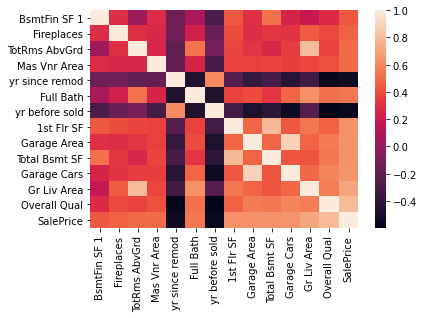

In [27]:
sns.heatmap(corrmat)

In [28]:
weak_corrs = sorted_corrs[sorted_corrs < 0.4]
clean_df = clean_df.drop(sorted_corrs[sorted_corrs < 0.4].index, axis=1)
clean_df

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,yr before sold,yr since remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,819.0,1003.0,GasA,TA,Y,1003,1003,1,TA,6,Typ,0,2.0,588.0,Y,142500,22,22
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,301.0,864.0,GasA,TA,Y,902,902,1,TA,5,Typ,0,2.0,484.0,Y,131000,23,23
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,Gable,CompShg,HdBoard,Wd Shng,0.0,TA,TA,PConc,337.0,912.0,GasA,TA,Y,970,970,1,TA,6,Typ,0,0.0,0.0,Y,132000,14,14
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,1071.0,1389.0,GasA,Gd,Y,1389,1389,1,TA,6,Typ,1,2.0,418.0,Y,170000,32,31


In [29]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [30]:
## Which categorical columns have we still carried with us? We'll test these 
obj_col = []
for col in nominal_features:
    if col in clean_df:
        obj_col.append(col)
obj_col

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [31]:
## How many unique values in each categorical column?
clean_col=[]
for col in obj_col:
 #   print (col +":", (len(clean_df[col].value_counts().sort_values())))
    print(col+":", len(clean_df[col].unique()))
    if len(clean_df[col].unique()) >= 10:
        clean_col.append(col) 
    else:
        clean_df[col] = clean_df[col].astype('category') 
clean_col


MS Zoning: 7
Street: 2
Land Contour: 4
Lot Config: 5
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Foundation: 6
Heating: 6
Central Air: 2


['Neighborhood', 'Exterior 1st', 'Exterior 2nd']

In [32]:
clean_df = clean_df.drop(clean_col, axis=1)

In [33]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MS Zoning       2927 non-null   category
 1   Street          2927 non-null   category
 2   Lot Shape       2927 non-null   object  
 3   Land Contour    2927 non-null   category
 4   Utilities       2927 non-null   object  
 5   Lot Config      2927 non-null   category
 6   Land Slope      2927 non-null   object  
 7   Condition 1     2927 non-null   category
 8   Condition 2     2927 non-null   category
 9   Bldg Type       2927 non-null   category
 10  House Style     2927 non-null   category
 11  Overall Qual    2927 non-null   int64   
 12  Roof Style      2927 non-null   category
 13  Roof Matl       2927 non-null   category
 14  Mas Vnr Area    2927 non-null   float64 
 15  Exter Qual      2927 non-null   object  
 16  Exter Cond      2927 non-null   object  
 17  Foundation    

In [34]:
dummy_cols = pd.DataFrame()
col_cat = clean_df.select_dtypes(include=['category'])
for col in col_cat:
    col_dummies = pd.get_dummies(clean_df[col])
    clean_df = pd.concat([clean_df, col_dummies], axis =1)   
    del clean_df[col]


In [35]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 99 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       2927 non-null   object 
 1   Utilities       2927 non-null   object 
 2   Land Slope      2927 non-null   object 
 3   Overall Qual    2927 non-null   int64  
 4   Mas Vnr Area    2927 non-null   float64
 5   Exter Qual      2927 non-null   object 
 6   Exter Cond      2927 non-null   object 
 7   BsmtFin SF 1    2927 non-null   float64
 8   Total Bsmt SF   2927 non-null   float64
 9   Heating QC      2927 non-null   object 
 10  1st Flr SF      2927 non-null   int64  
 11  Gr Liv Area     2927 non-null   int64  
 12  Full Bath       2927 non-null   int64  
 13  Kitchen Qual    2927 non-null   object 
 14  TotRms AbvGrd   2927 non-null   int64  
 15  Functional      2927 non-null   object 
 16  Fireplaces      2927 non-null   int64  
 17  Garage Cars     2927 non-null   f

In [36]:
def up_transform_features1(df):
    ames_null_counts = df.isnull().sum()
    ames_high_null = df[ames_null_counts[(ames_null_counts>=len(df)/20)].index]
    df = df.drop(ames_high_null, axis=1)
    
    ames_null_counts = df.isnull().sum()
    ames_low_null = df[ames_null_counts[(ames_null_counts>0) &  (ames_null_counts<len(df)/20)].index]
    ames_low_obj = ames_low_null.select_dtypes(include=["object"]).isnull().sum()
    df = df.drop(ames_low_obj.index, axis=1)
    
    ames_low_null = ames_low_null.select_dtypes(include=['float', 'int'])
    df = df.fillna(ames_low_null.mode().iloc[0])  
    
    df["yr before sold"]=df['Yr Sold'] - df['Year Built']
    df["yr before sold"][df["yr before sold"] < 0]

    df["yr since remod"]=df['Yr Sold'] - df['Year Remod/Add']
    df["yr since remod"][df["yr since remod"] < 0]
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

In [37]:
def up_select_features1(df):
    num_df = df.select_dtypes(['int', 'float'])
    #see the closest correlation - make into abs number and sort
    weak_corrs = sorted_corrs[sorted_corrs < 0.4]
    df = df.drop(sorted_corrs[sorted_corrs < 0.4].index, axis=1)

    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    ## Which categorical columns have we still carried with us? We'll test these 
    obj_col = []
    for col in nominal_features:
        if col in df:
            obj_col.append(col)
    ## How many unique values in each categorical column?
    clean_col=[]
    for col in obj_col:
        if len(df[col].unique()) >= 10:
            clean_col.append(col) 
        else:
            df[col] = df[col].astype('category') 
    df = df.drop(clean_col, axis=1)
    dummy_cols = pd.DataFrame()
    col_cat = df.select_dtypes(include=['category'])
    for col in col_cat:
        col_dummies = pd.get_dummies(df[col])
        df = pd.concat([df, col_dummies], axis =1)   
        del df[col]
    return df

In [38]:
def up_train_and_test1(df):
    train = df[:1460]
    test = df[1460:]  
    train_numeric = train.select_dtypes(include=['integer', 'float'])
    del train_numeric['SalePrice']
    features = train_numeric.columns
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    train_prediction = lr.predict(train[features])
    test_prediction = lr.predict(test[features])
    test_mse = mean_squared_error(test_prediction, test["SalePrice"])
    test_rmse =np.sqrt(test_mse)
    print (test_rmse)
    return (test_rmse)

In [39]:
ames2 = pd.read_csv("AmesHousing.tsv", delimiter="\t")
clean_df1= up_transform_features1(ames2)
up_select_features1 = up_select_features1(clean_df1)
test_rmse1 = up_train_and_test1(up_select_features1)

35064.65061929965


In [43]:
def up_select_features1(df):
    num_df = df.select_dtypes(['int', 'float'])
    #see the closest correlation - make into abs number and sort
    weak_corrs = sorted_corrs[sorted_corrs < 0.4]
    df = df.drop(sorted_corrs[sorted_corrs < 0.4].index, axis=1)

    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    ## Which categorical columns have we still carried with us? We'll test these 
    obj_col = []
    for col in nominal_features:
        if col in df:
            obj_col.append(col)
    ## How many unique values in each categorical column?
    clean_col=[]
    for col in obj_col:
        if len(df[col].unique()) >= 10:
            clean_col.append(col) 
        else:
            df[col] = df[col].astype('category') 
    df = df.drop(clean_col, axis=1)
    dummy_cols = pd.DataFrame()
    col_cat = df.select_dtypes(include=['category'])
    for col in col_cat:
        col_dummies = pd.get_dummies(df[col])
        df = pd.concat([df, col_dummies], axis =1)   
        del df[col]
    return df

In [46]:
def up2_train_and_test(df, k=0):

    train_numeric = df.select_dtypes(include=['integer', 'float'])
    del train_numeric['SalePrice']
    features = train_numeric.columns
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features], train["SalePrice"])
        train_prediction = lr.predict(train[features])
        test_prediction = lr.predict(test[features])
        test_mse = mean_squared_error(test_prediction, test["SalePrice"])
        test_rmse =np.sqrt(test_mse)
        print (test_rmse)
        return (test_rmse)
    
    if k == 1:
        shuffle_listings = np.random.permutation(df.index)
        df =df.reindex(shuffle_listings)
        fold_one = df[:1460]
        fold_two = df[1460:]
        lr.fit(fold_one[features], fold_one["SalePrice"])
        fold_two_predict = lr.predict(fold_two[features])
        iteration_one_rmse = mean_squared_error(fold_two["SalePrice"],
        fold_two_predict)**(1/2)
        
        lr.fit(fold_two[features], fold_two["SalePrice"])
        fold_one_predict= lr.predict(fold_one[features])
        iteration_two_rmse = mean_squared_error(fold_one["SalePrice"],
        fold_one_predict)**(1/2)
        avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])
        print(avg_rmse)
        return avg_rmse
    
    else:
        kf=KFold(n_splits=k, shuffle=True, random_state=1)
        mses= cross_val_score(lr, df[features], df["SalePrice"], scoring="neg_mean_squared_error", cv=kf)
        rmse= np.sqrt(np.absolute(mses))
        avg_rmse=np.mean(rmse)
        print(avg_rmse)
        return avg_rmse

In [50]:
ames2 = pd.read_csv("AmesHousing.tsv", delimiter="\t")
clean_df2= up_transform_features(ames2)
up_select_features = up_select_features1(clean_df2)
test_rmse1 = up2_train_and_test(up_select_features, 4)

31489.103051885813
